# Break Down of the TSNE Plots (Supervised Learning) 

## Author: Ridha Alkhabaz 
Here we try to get insights about the clustering structure of the base. We analyse the dataset used for classification using supervised learning 

## Imports;

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
import pandas as pd
import numpy as np 
import networkx as nx
from networkx import algorithms 
import math
from numpy import arctan2, sin, cos, sqrt, radians
from pyproj import Geod

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import osmnx as ox
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
import pickle5 as pickle
import data_loader as dl
import feature_eng as fe

## Data reading and Cleaning:

In [7]:
with open('block4_29_comp_aug_idfix.pkl', 'rb') as fh:
    df = pickle.load(fh)

aggregation used for the supervised learning models.

In [8]:
df_agg = df[np.isin(df['type'], ['Car','Taxi'])] \
        .groupby(['id']).agg({
            'xtrack_dist': 'std',
            'avg_surr_speed': ['mean','std'],
            'lon_acc': ['mean','std'],
            'lat_acc': ['mean','std'],
            'type': 'first'
        }) \
        .reset_index(drop=True)

In [9]:
X = df_agg.copy()
X = X.drop(['type'],axis=1)

## TSNE Plots with different preplexities 

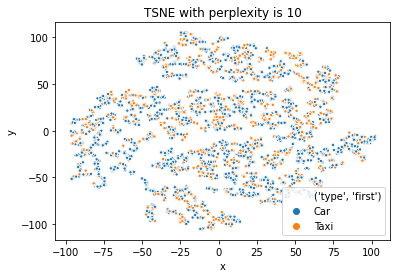

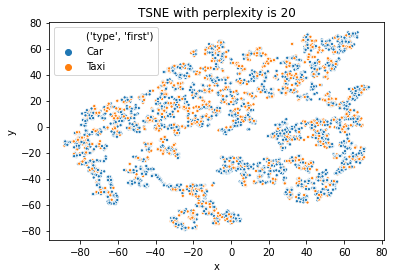

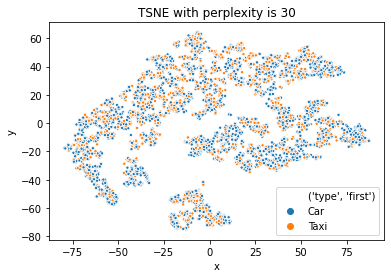

In [ ]:
for prep in [10, 20, 30, 40]:
    # Perform the TSNE non-linear dimensionality reduction
    tsne = TSNE(n_components=2, perplexity=prep, random_state=1000)
    data_tsne = tsne.fit_transform(X)


    #concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df_agg.index)
    dff = pd.concat([df_agg, df_tsne], axis=1)

    # Plot the projected (x,y) coordinates
    sns.scatterplot(x='x', y='y', hue=("type", 'first'), data=dff, s=10)
    plt.title("TSNE with perplexity is %s"%prep)
    plt.show()